In [1]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/ani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ani/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/ani/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [ ]:
data = pd.read_csv(r'../fake_or_real_news.csv')

In [4]:
data = data.drop(['author'], axis = 1)

In [5]:
data = data.iloc[:, :3]
data.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
data = data.dropna()

## Replacing values of ***label*** column from ***FAKE*** to ***1*** and ***REAL*** to ***0***

In [7]:
data.loc[data.label != 'REAL', 'label'] = 1
data.loc[data.label == 'REAL', 'label'] = 0

## Flattening 2D Y array to ***linear array***

In [8]:
y = data.iloc[:, -1:].values
y = [i for sub in y for i in sub]

## Exracting x by combining ***title*** and ***text***

In [9]:
def transform(c):
    return c["title"] + " " + c["text"]
x = data.apply(transform, axis=1)

In [10]:
def lemma(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    text = [w for w in text if not w in stop_words]
    text = [lemmatizer.lemmatize(word) for word in text]
    text = " ".join(text)
    return text

In [11]:
x = x.apply(lemma)
x

0        smell hillary fear daniel greenfield shillman ...
1        watch exact moment paul ryan committed politic...
2        kerry go paris gesture sympathy u secretary st...
3        bernie supporter twitter erupt anger dnc tried...
4        battle new york primary matter primary day new...
                               ...                        
70795    tesla earnings smash expectation dramatic chan...
70796    rule ruler world really work following video m...
70797    fact check trump right clinton might cause ww ...
70798    caught tape isi destroys iraqi abrams anti tan...
70799    obamacare architect admits law working designe...
Length: 64733, dtype: object

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

In [13]:
c_vec = CountVectorizer(max_features=5000)
lr_model = LogisticRegression()

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [15]:
x_train = c_vec.fit_transform(x_train).toarray()
x_test = c_vec.transform(x_test).toarray()

In [16]:
def logReg(x, y):
  lr_model.fit(x_train, y_train)
  y_trainPred = lr_model.predict(x_train)
  y_testPred = lr_model.predict(x_test)
  print("Accuracy of training = ", accuracy_score(y_trainPred, y_train))
  print('Training accuracy\n')
  print(classification_report(y_train, y_trainPred))
  print("Accuracy of Testing = ", accuracy_score(y_testPred, y_test))
  print('Testing Results\n')
  clf_report = classification_report(y_test, y_testPred, output_dict=True)
  print(classification_report(y_test, y_testPred))
  return clf_report

In [17]:
clf = logReg(x_train, y_train)

/home/ani/Aiproj/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of training =  0.9981655273626077
Training accuracy

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2519
           1       1.00      1.00      1.00     49267

    accuracy                           1.00     51786
   macro avg       1.00      0.98      0.99     51786
weighted avg       1.00      1.00      1.00     51786

Accuracy of Testing =  0.9765968950335985
Testing Results

              precision    recall  f1-score   support

           0       0.81      0.69      0.74       642
           1       0.98      0.99      0.99     12305

    accuracy                           0.98     12947
   macro avg       0.90      0.84      0.87     12947
weighted avg       0.98      0.98      0.98     12947



<AxesSubplot:>

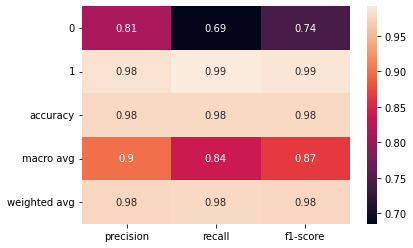

In [18]:
import seaborn as sns
sns.heatmap(pd.DataFrame(clf).iloc[:-1, :].T, annot=True)

In [19]:
import joblib
model = joblib.load('Lemmatization-TT-CountVectorize')

## Testing the model on user given input

In [20]:
sen = "Defending her performance against recent reports of cognitive decline, senior United States senator Dianne Feinstein argued Friday that she was still perfectly mentally fit to continue captaining the submarine. “If my fish colleagues have any doubts about my ability to damn the torpedoes or up the periscope, they simply haven’t told me,” said Feinstein, who admitted that she had briefly forgotten her first lieutenant’s name during a meeting at his battle station before blaming it on stress related to enemy ships rapidly pinging on radar. “Until I hear a compelling reason why I should step down as captain of this ship, I’m afraid I’ll just have to chock up these rumors to a mutiny brewing among my crew.” Feinstein declined to discuss her retirement, stressing that even if the submarine should spring a leak, she was prepared to go down with the ship."
sen = lemma(sen)
sen = pd.Series(sen)
sen = sen = c_vec.transform(sen).toarray()

In [21]:
print(model.predict(sen))


[1]


In [22]:
sen2 = "Filing Provides New Details on Trump White House Planning for Jan. 6 WASHINGTON — Before the Jan. 6 attack on the Capitol, Trump White House officials and members of the right-wing House Freedom Caucus strategized about a plan to direct thousands of angry marchers to the building, according to newly released testimony obtained by the House committee investigating the riot and former President Donald J. Trumps efforts to overturn the election.On a planning call that included Mark Meadows, the White House chief of staff; Rudolph W. Giuliani, Mr. Trumps personal lawyer; Representative Jim Jordan, Republican of Ohio; and other Freedom Caucus members, the group discussed the idea of encouraging supporters to march to the Capitol, according to one witnesss account.The idea was endorsed by Representative Scott Perry, Republican of Pennsylvania, who now leads the Freedom Caucus, according to testimony by Cassidy Hutchinson, an aide to Mr. Meadows, and no one on the call spoke out against the idea.“I dont think theres a participant on the call that had necessarily discouraged the idea,” Ms. Hutchinson told the committees investigators.The nearly two-mile march from the president “Stop the Steal” rally at the Ellipse to the Capitol, where parts of the crowd became a violent mob, has become a focus of both the House committee and the Justice Department as they investigate who was responsible for the violence.Mr. Meadows and members of the Freedom Caucus, who were deeply involved in Mr. Trump push to overturn the 2020 election, have condemned the violence at the Capitol on Jan. 6 and defended their role in spreading the lie of a stolen election.Ms. Hutchinsons testimony and other materials disclosed by the committee in a 248-page court filing on Friday added new details and texture to what is publicly known about the discussions in Mr. Trumps inner circle and among his allies in the weeks preceding the Jan. 6 assault."
sen2 = lemma(sen2)
sen2 = pd.Series(sen2)
sen2 = sen = c_vec.transform(sen2).toarray()

In [23]:
print(model.predict(sen2))

[0]


In [24]:
sen3 = "Local election chief threatened by Republican leader seeking illegal access to voting equipment April 23 (Reuters) - A local Republican Party leader in North Carolina threatened to get a county elections director fired or have her pay cut unless she helped him gain illegal access to voting equipment, the state elections board told Reuters. The party official, William Keith Senter, sought evidence to support false conspiracy theories alleging the 2020 election was rigged against former U.S. President Donald Trump. The previously unreported incident is part of a national effort by Trump supporters to audit voting systems to bolster the baseless stolen-election claims. Senter, chair of the Surry County Republican Party, told elections director Michella Huff that he would ensure she lost her job if she refused his demand to access the county's vote tabulators, the North Carolina State Board of Elections said in written responses to questions from Reuters. Senter was aggressive, threatening, and hostile, in two meetings with Huff, the state elections board said, citing witness accounts. Senter did not respond to requests for comment. Huff, who refused Senter's demands, was disturbed by the incident of political intimidation. Such threats have become common nationwide since the 2020 election. Reuters has documented more than 900 threatening or hostile messages aimed at election officials in a series of investigative reports."
sen3 = lemma(sen3)
sen3 = pd.Series(sen3)
sen3 = sen = c_vec.transform(sen3).toarray()

In [25]:
print(model.predict(sen3))


[1]
